# Задание

Эмпирическая функция распределения на самом деле является более точной оценкой генеральной функции распределения, нежели просто состоятельная оценка значения в точке. А именно, имеет место теорема Гливенко-Кантелли:
$$\sup_x |F(x) - \bar{F}_n(x)| \to 0, n \to \infty$$

Доказывать подобного рода утверждения в нашем курсе времени нет, однако этот факт достаточно несложно увидеть прямым моделированием. Конечно, исследовать сходимость “почти наверное” моделированием не очень удобно, но мы можем хотя бы рассмотреть более слабую сходимость по вероятности, которая напрямую следует из сходимости “почти наверное”. А для установления сходимости по вероятности у нас есть удобные инструменты: например, всевозможные неравенства, связывающие сходимость по вероятности со сходимостью выборочных характеристик.

Итак, прямым моделированием покажите выполнение теоремы Гливенко-Кантелли (в “слабом смысле”: со сходимостью по вероятности к нулю).

Требования:
 - Для сдачи домашнего задания используйте Google Colab/Github. Ожидается, что ноутбук будет выложен на Github/Colab (не файл .ipyn}, присланный куда-либо).
 - Для данного домашнего задания можно использовать языки программирования R, Python.
 - Задания необходимо выполнять в RMarkdown либо Jupyter Notebook с комментариями и пояснениями.

----------------------------------------------------------------------
Для моделирования было выбрано нормальное распределение с математическим ожиданием 1 и дисперсией 9. Теоретическую функцию распределения будем строить с помощью библиотеки scipy.

# 1) Импортирование библиотек, которые понадобятся в ходе выполнения задания

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 2) Построение теоретической функции распределения

Зададим параметры: a = мат. ожидание, sigma = среднеквадратическое отклонение

In [16]:
a = 1
sigma = 3

Отрисуем получившуюся теоретическую функцию распределения

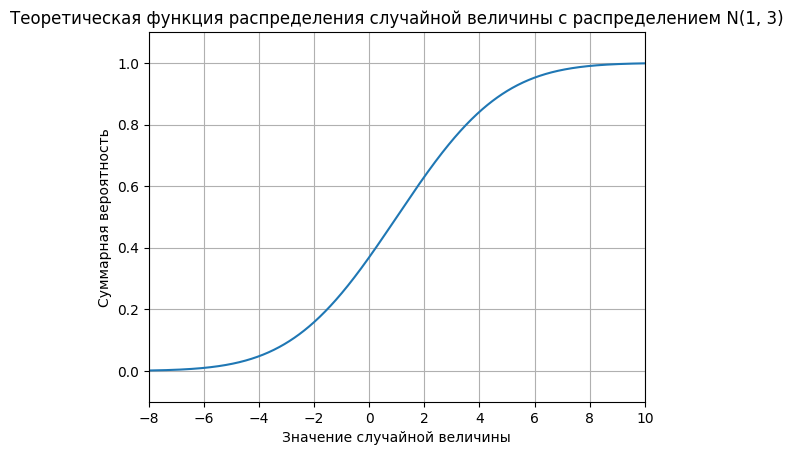

In [4]:
def plot_theor_cdf(a, sigma):
    x = np.linspace(a-3*sigma, a+3*sigma, 1000)  # cгенерируем массив точек по оси 'x'
    cdf = norm.cdf(x, a, sigma)  # c помощью библиотеки scipy сгенерируем массив точек вдоль оси 'y'
    plt.plot(x, cdf)
    plt.title('Теоретическая функция распределения случайной величины с распределением N(1, 3)')
    plt.xlabel('Значение случайной величины')
    plt.ylabel('Суммарная вероятность')
    plt.xlim([a-3*sigma, a+3*sigma])  # установим пределы по оси 'x' - как вариант, воспользуемся "правилом трех сигм"
    plt.ylim([-0.1,1.1])
    plt.grid()
    plt.show()
plot_theor_cdf(a, sigma)

# 3) Построение эмпирической функции распределения

Определим вспомогательную функцию для отрисовки эмпирической функции распределения:

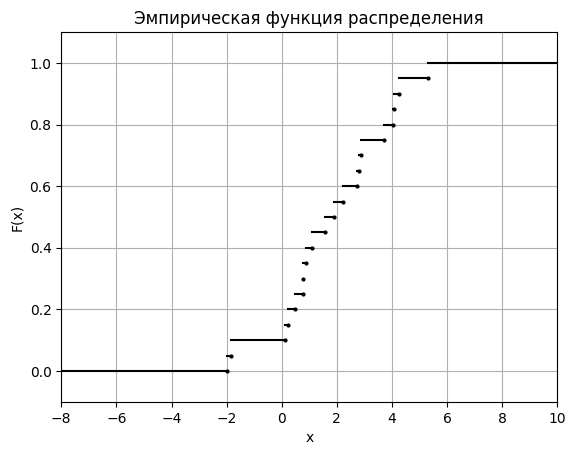

In [12]:
def plot_empirical_cdf(n, a, sigma):  # n - количество значений в выборке
    samples = np.random.normal(1, 3, n)  # генерируем выборку из нормального распределения длиной n
    x = np.sort(samples)  # сортировка для построения
    y = np.arange(1, len(samples) + 1) / len(samples)  # точки для построения по оси y, значения от 0.1 до 1
    for i in range(len(y) - 1):
        plt.plot(np.linspace(x[i], x[i+1], 1000), [y[i]]*1000, 'k')  # горизонтальные линии
        plt.plot(x[i+1], y[i],'k',  marker='o', markersize='2')  # точки, для того, чтобы подчеркнуть непрерывность слева
    plt.plot(np.linspace(x[-1], a+3*sigma, 1000), [y[-1]]*1000, 'k')  # построение горизонтальной линии при y = 1
    plt.plot(np.linspace(x[0], a-3*sigma, 1000), [0]*1000, 'k')  # построение горизонтальной линии при y = 0
    plt.plot(x[0], 0,'k',  marker='o', markersize='2')  # построение точки при y = 0 для непрерывности слева
    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.title('Эмпирическая функция распределения')
    plt.xlim([a-3*sigma, a+3*sigma])
    plt.ylim([-0.1,1.1])
    plt.grid()
    plt.show()
plot_empirical_cdf(20, a, sigma)

# 4) Построение эмпирической и теоретической функций распределения на одном графике

Зададим массив различных значений n

In [13]:
numbers = [10, 20, 50, 100, 250, 500 ,1000, 5000]

Построим теоретические и эмпирические функции распределения на одном графике при разных n (зря я в предыдущих пунктах обертывал все в функции, думал получится одновременно строить с помощью hold(), но этот метод убрали, и теперь придется писать повторяющийся код)

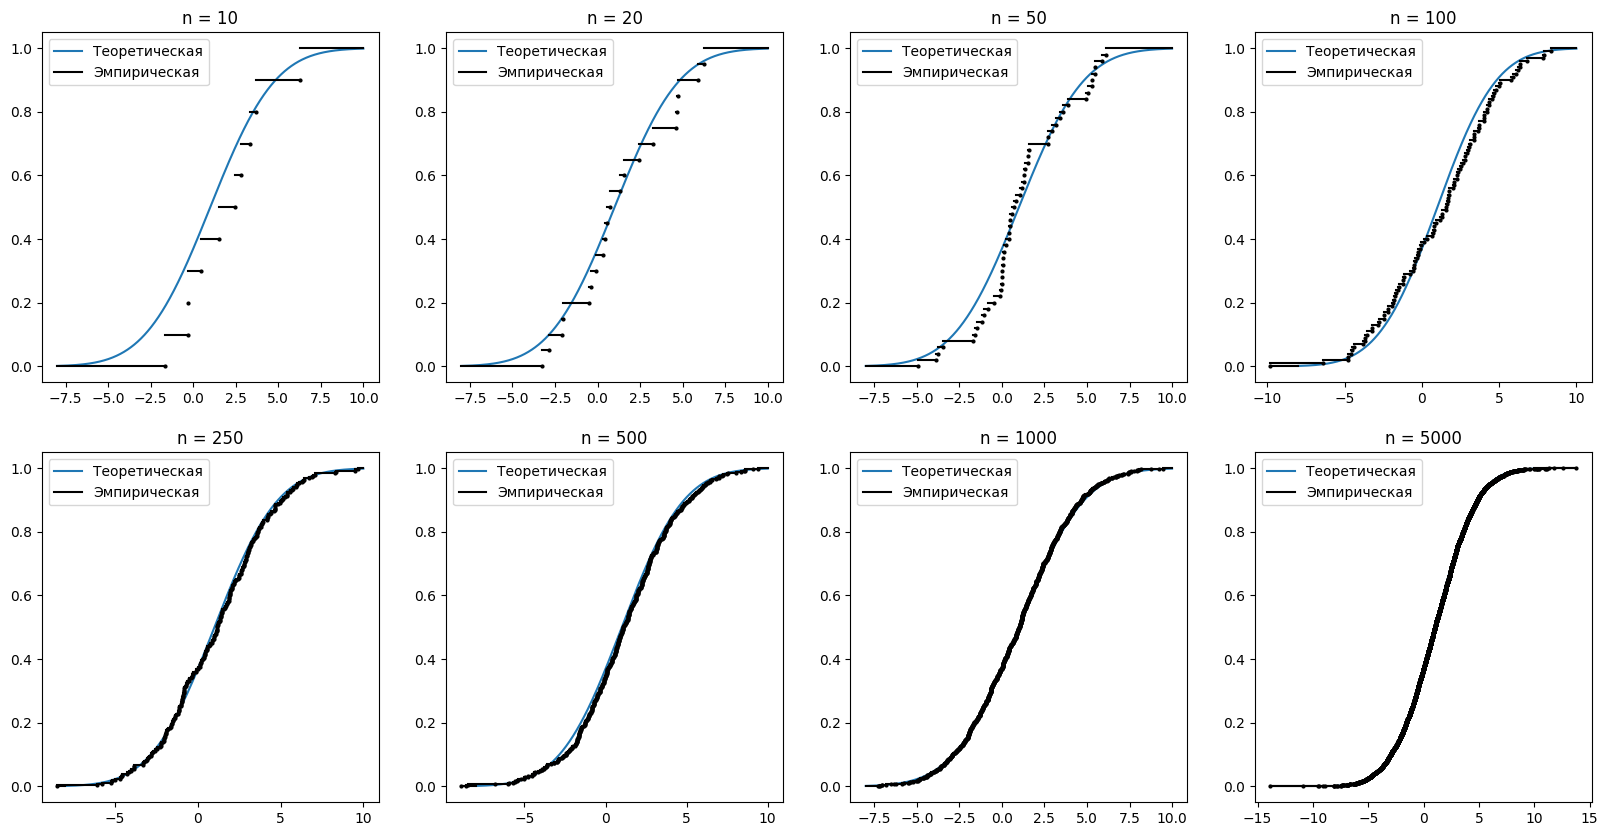

In [14]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # сказали, что будет матрица из пикч длиной 4 и высотой 2
x_theor = np.linspace(a-3*sigma, a+3*sigma, 1000)  # задали координату x для построения теоретической функции распределения
ctr = 0  # счетчик для итерации оп массиву numbers
for i in range(2):  # 2 пикчи в высоту
    for j in range(4):  # 4 пикчи в длину
        axs[i, j].plot(x_theor, norm.cdf(x_theor, a, sigma), label='Теоретическая')  # теоретическая функция распределения
        x_empir = np.sort(np.random.normal(1, 3, numbers[ctr]))  # создаем массив иксов для эмпирической функции распределения
        y = np.arange(1, numbers[ctr] + 1) / numbers[ctr]  #создаем массив игреков для эмпирической функции распределения
        for t in range(len(y) - 1):  # рисуем эмпирическую функцию распределения
            axs[i, j].plot(np.linspace(x_empir[t], x_empir[t+1], 1000), [y[t]]*1000, 'k')  # горизонтальные линии
            axs[i, j].plot(x_empir[t+1], y[t],'k',  marker='o', markersize='2')  # точки, для того, чтобы подчеркнуть непрерывность слева
        axs[i, j].plot(np.linspace(x_empir[-1], a+3*sigma, 1000), [y[-1]]*1000, 'k', label='Эмпирическая')  # построение горизонтальной линии при y = 1
        axs[i, j].plot(np.linspace(x_empir[0], a-3*sigma, 1000), [0]*1000, 'k')  # построение горизонтальной линии при y = 0
        axs[i, j].plot(x_empir[0], 0,'k',  marker='o', markersize='2')  # построение точки при y = 0 для непрерывности слева
        axs[i, j].set_title(f'n = {numbers[ctr]}')
        axs[i, j].legend()
        ctr += 1

Из построенных графиков видно, что при увеличении числа элементов в выборке, эмпирическая функция распределения приближается к теоретической.